In [57]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction import text  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

import sqlite3
cnx = sqlite3.connect('db.sqlite3')

def is_spam(EmailText):
   
    df = pd.read_sql_query("SELECT * FROM application_data_set",cnx)
    
    X = df['EmailText']
    Y = df['Label']
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)
        
    
    vectorizer = text.CountVectorizer(stop_words="english")
    counts = vectorizer.fit_transform(X_train.values)
    spam_nb = MultinomialNB()
    spam_nb.fit(counts,Y_train.values)
    
    labels = ['ham','spam']
    y_train_pred = cross_val_predict(spam_nb, counts, Y_train.values, cv=3)    
    cm = confusion_matrix(Y_train, y_train_pred,labels=labels) 
    
    plt.style.use('classic')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels, **csfont)
    ax.set_yticklabels([''] + labels, **csfont)
    plt.xlabel('Predicted Label',fontsize=14, **csfont)
    plt.ylabel('Expected Label',fontsize=14, **csfont)
    plt.title('Confusion matrix of the classifier',fontsize=16, fontweight='bold',y=-.12,**csfont)
    plt.show()
    
    test_vect = vectorizer.transform(np.array([EmailText]))
    predict_test_vect = spam_nb.predict(test_vect)
    new_row = {'Label':predict_test_vect[0],'EmailText':EmailText,'id' :df.shape[0]+1}
    df = df.append(new_row,ignore_index=True)
    df.to_sql(name='application_data_set',con=cnx,if_exists = 'replace',index=False)
    
    return predict_test_vect[0] == 'spam'


/home/saad/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


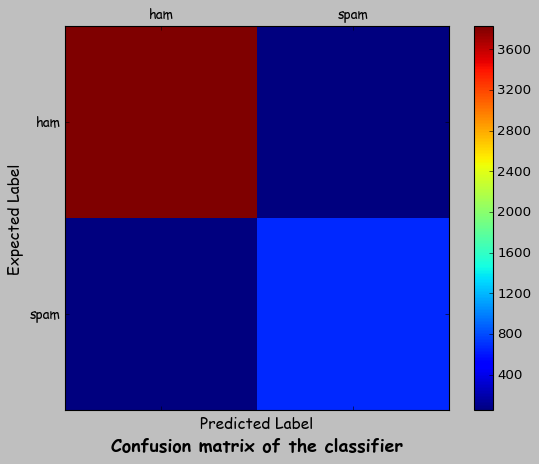

True


In [58]:
print(is_spam("This is to inform you on the release of the EL-GORDO SWEEPSTAKE LOTTERY PROGRAM held on the 29th OF APRIL 2005. Your name is attached to ticket number 025-11-464-992-750 with serial number 2113-05 drew the lucky numbers 13-15-16-21-34-36 which consequently won the lottery in the 3rd category."))

In [60]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']